In [1]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#nltk libraries
from re import sub
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, wordnet
from nltk import pos_tag

In [3]:
dataset = pd.read_csv("text_emotion.csv")
dataset.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
dataset.shape

(40000, 4)

In [5]:
df = dataset.copy()
df.drop(['tweet_id', 'author'], axis = 1, inplace=True)
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [6]:
df.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [7]:
y = df.sentiment.values

In [8]:
from sklearn.preprocessing import LabelEncoder
label_y = LabelEncoder()
y = label_y.fit_transform(y)

In [16]:
def get_simple_pos(tag):    
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return 'r'
    else:
        return wordnet.NOUN

In [24]:
x = []
for i in range(df.content.shape[0]):
    a = sub('[^a-zA-Z]', " ", df.content[i])
    a = a.strip().split()
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(word, pos = get_simple_pos(pos_tag([word])[0][1])).lower() for word in a if not word.lower() in set(stopwords.words('english'))]
    a = " ".join(a)
    x.append(a)
x[:5]

['tiffanylue know listenin bad habit earlier start freakin part',
 'layin n bed headache ughhhh waitin call',
 'funeral ceremony gloomy friday',
 'want hang friend soon',
 'dannycastillo want trade someone houston ticket one']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [40]:
score = []
for i in range(500, 2001, 100):
    tfidf = TfidfVectorizer(max_features= i)
    X_train_final = tfidf.fit_transform(X_train).toarray()
    classifier = LogisticRegression()
    score.append(cross_val_score(classifier, X_train_final, y= y_train, cv= 3).mean())

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

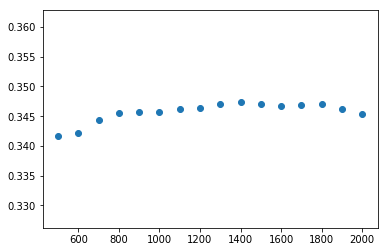

In [41]:
plt.scatter(range(500, 2001, 100), score)